# Import libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

In [26]:
# Set random seed to get the same result after each time running the code
tf.random.set_seed(1234)

# Import dataset

In [27]:
data_folder = 'Sales'  
all_month_data_2022 = pd.DataFrame()
all_month_data_2023 = pd.DataFrame()

'''filename = os.path.join(data_folder, 'TT T12-2021.csv')
if os.path.isfile(filename):
    data = pd.read_csv(filename)
    all_month_data_2022 = pd.concat([all_month_data_2022, data])'''

for i in range(1, 13):
    filename = os.path.join(data_folder, f'TT T{i}-2022.csv')  
    if os.path.isfile(filename):
        data = pd.read_csv(filename)
        all_month_data_2022 = pd.concat([all_month_data_2022, data])
        
for i in range(1, 8):
    filename = os.path.join(data_folder, f'TT T{i}-2023.csv')  
    if os.path.isfile(filename):
        data = pd.read_csv(filename)
        all_month_data_2023 = pd.concat([all_month_data_2023, data])


all_month_data_2022['month'] = pd.to_datetime(all_month_data_2022['month'], format='%Y%m').dt.strftime('%Y-%m')
all_month_data_2022['week'] = all_month_data_2022['week'].astype(str).str.slice(-2)
#all_month_data_2022.set_index(('month','week)', inplace=True)
all_month_data_2022

,month,week,region,store_concept,store_type,address_3,address_2,channel_id,distribution_channel,sales_season,final_status,mch_description,name_description,sold_quantity,cost_price,net_price,customer_id,product_id
0,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,17DE,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
1,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,18AP,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
2,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,18AU,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
3,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,18DE,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
4,2022-01,01,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,19AP,KHÁC,NHÓM HÀNG CHẬM,"Dép lào Nữ, Xanh nhớt, 39",1,51680,76000,dd5a95cfa,2429a82fe6274441abc1f4192d84c58cXNH39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218626,2022-12,52,KVTN,Cửa hàng B thông thường,Độc lập,ĐNO,Tp. Gia Nghĩa,CHTT,Bán lẻ,23AU,CORE,NHÓM PHỤ KIỆN,"Vớ Nam Biti's combo 2, Xám, 25",3,136197,201000,4efe110d1,8fcd05874c5445f8a7f403169903edc5XAM25
218627,2022-12,52,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,22AU,KHÁC,NHÓM GÌAY THỂ THAO,"GTT quai dệt bé gái, Hồng, 39",1,379885,559000,dd5a95cfa,34e8a3fbf13245749251726178b2756cHOG39
218628,2022-12,52,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,22DE,NEW,NHÓM GÌAY THỂ THAO,"GTT quai dệt bé gái, Hồng, 39",1,379885,559000,dd5a95cfa,34e8a3fbf13245749251726178b2756cHOG39
218629,2022-12,52,KVMN,Cửa hàng B thông thường,Độc lập,HCM,Q. 6,CHTT,Bán lẻ,23AP,CORE,NHÓM GÌAY THỂ THAO,"GTT quai dệt bé gái, Hồng, 39",1,379885,559000,dd5a95cfa,34e8a3fbf13245749251726178b2756cHOG39


In [28]:
all_month_data_2023['month'] = pd.to_datetime(all_month_data_2023['month'], format='%Y%m').dt.strftime('%Y-%m')
all_month_data_2023['week'] = all_month_data_2023['week'].astype(str).str.slice(-2)
all_month_data_2023

,month,week,region,store_concept,store_type,address_3,address_2,channel_id,distribution_channel,sales_season,final_status,mch_description,name_description,sold_quantity,cost_price,net_price,customer_id,product_id
0,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,22AP,Core,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
1,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,22AU,CORE,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
2,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,22DE,CORE,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
3,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,23AP,CORE,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
4,2023-01,01,KVTN,Cửa hàng B thông thường,Độc lập,BĐH,Tx. An Nhơn,CHTT,Bán lẻ,23AU,CORE,NHÓM PHỤ KIỆN,"Vớ bé trai Biti's combo 2, Xám, 23",2,70720,104000,36c1e6a9e,b3dacdf30b204b72be4ab8341d9f4559XAM23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122090,2023-07,31,KVMN,Cửa hàng B thông thường,Độc lập,LAN,Tx. Kiến Tường,CHTT,Bán lẻ,23AP,CORE,NHÓM 88,"Giày si búp bê nữ 88, Đen, 39",1,267055,393000,b72b4f645,72b2b06cfde645a8a584e350a707c05aDEN39
122091,2023-07,31,KVMN,Cửa hàng B thông thường,Độc lập,LAN,Tx. Kiến Tường,CHTT,Bán lẻ,23AU,CORE,NHÓM 88,"Giày si búp bê nữ 88, Đen, 39",1,267055,393000,b72b4f645,72b2b06cfde645a8a584e350a707c05aDEN39
122092,2023-07,31,KVTN,Cửa hàng B thông thường,Độc lập,ĐLK,Tp. Buôn Ma Thuột,CHTT,Bán lẻ,22DE,KHÁC,NHÓM 88,"Sandal thông dụng đế TPR Nữ 88, Kem, 39",1,196953,290000,26d9ea0ef,2c23904c5a39440b8e71a0e7fc1669b4KEM39
122093,2023-07,31,KVTN,Cửa hàng B thông thường,Độc lập,ĐLK,Tp. Buôn Ma Thuột,CHTT,Bán lẻ,23AP,KHÁC,NHÓM 88,"Sandal thông dụng đế TPR Nữ 88, Kem, 39",1,196953,290000,26d9ea0ef,2c23904c5a39440b8e71a0e7fc1669b4KEM39


In [29]:
all_month_data_2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3351027 entries, 0 to 218630
Data columns (total 18 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   month                 object
 1   week                  object
 2   region                object
 3   store_concept         object
 4   store_type            object
 5   address_3             object
 6   address_2             object
 7   channel_id            object
 8   distribution_channel  object
 9   sales_season          object
 10  final_status          object
 11  mch_description       object
 12  name_description      object
 13  sold_quantity         int64 
 14  cost_price            int64 
 15  net_price             int64 
 16  customer_id           object
 17  product_id            object
dtypes: int64(3), object(15)
memory usage: 485.8+ MB


In [30]:
all_month_data_2023.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881831 entries, 0 to 122094
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   month                 881831 non-null  object
 1   week                  881831 non-null  object
 2   region                881831 non-null  object
 3   store_concept         878126 non-null  object
 4   store_type            881831 non-null  object
 5   address_3             881831 non-null  object
 6   address_2             881831 non-null  object
 7   channel_id            881831 non-null  object
 8   distribution_channel  881831 non-null  object
 9   sales_season          881831 non-null  object
 10  final_status          881831 non-null  object
 11  mch_description       881831 non-null  object
 12  name_description      881831 non-null  object
 13  sold_quantity         881831 non-null  int64 
 14  cost_price            881831 non-null  int64 
 15  net_price        

In [31]:
# Count the distinct occurrences of values in 'col1'
value_counts = all_month_data_2022['region'].value_counts()

# Print the result
print(value_counts)

KVMN          1675645
KVMT           573191
KVMB           529734
KVTN           361393
KVMTR          162209
Khác            43531
KVCA             5088
Trung Quốc        236
Name: region, dtype: int64


In [32]:
result_by_week = all_month_data_2022.groupby('week').sum().append(all_month_data_2023.groupby('week').sum())
result_by_week_and_region = all_month_data_2022.groupby(['week', 'region']).sum().append(all_month_data_2023.groupby(['week', 'region']).sum())

result_KVMN = result_by_week_and_region.loc[(slice(None), 'KVMN'), :]
result_KVMB = result_by_week_and_region.loc[(slice(None), 'KVMB'), :]
result_KVMTR = result_by_week_and_region.loc[(slice(None), 'KVMTR'), :]
result_KVTN = result_by_week_and_region.loc[(slice(None), 'KVTN'), :]
result_KVMT = result_by_week_and_region.loc[(slice(None), 'KVMT'), :]
#result_KVNN = result_by_week_and_region.loc[(slice(None), 'KVNN'), :]

In [33]:
result_by_month = all_month_data_2022.groupby('month').sum().append(all_month_data_2023.groupby('month').sum())
result_by_month_and_region = all_month_data_2022.groupby(['month', 'region']).sum().append(all_month_data_2023.groupby(['month', 'region']).sum())

result_KVMN_month = result_by_month_and_region.loc[(slice(None), 'KVMN'), :]
result_KVMB_month = result_by_month_and_region.loc[(slice(None), 'KVMB'), :]
result_KVMTR_month = result_by_month_and_region.loc[(slice(None), 'KVMTR'), :]
result_KVTN_month = result_by_month_and_region.loc[(slice(None), 'KVTN'), :]
result_KVMT_month = result_by_month_and_region.loc[(slice(None), 'KVMT'), :]

In [34]:
print (result_by_week)
result_by_week['week'] = range(1,84)

      sold_quantity   cost_price    net_price
week                                         
01           228647  22380873930  29252908365
02           164601  17207306000  23423110275
03           189463  19894780340  27590514429
04           275046  28863087090  40486110403
05            24455   2345966640   3399711680
...             ...          ...          ...
27            35123   5131344226   6698369851
28            28732   3927321840   5300735028
29            30515   4037900840   5419778811
30            27667   3697672369   5091499462
31             3839    504426091    700351310

[83 rows x 3 columns]


In [35]:
print (result_by_month)

         sold_quantity   cost_price     net_price
month                                            
2022-01         861643  88715076880  121281591472
2022-02         328615  38139153260   52019062285
2022-03         239373  26338131989   36378597512
2022-04         376992  42878698392   57760451826
2022-05         275539  29854115469   41410724836
2022-06         309830  31599067065   43547009281
2022-07         354642  40268107234   53758362170
2022-08         364287  47501069462   64852713830
2022-09         206815  25359454894   35435572743
2022-10         189547  24332333441   33613199178
2022-11         229074  32725062404   41948752994
2022-12         257515  34125145529   46426488012
2023-01         239739  31710965948   44661071151
2023-02         108202  12932754270   17754506864
2023-03         122113  16016278360   21803140884
2023-04         149945  20297406494   26500520956
2023-05         118749  14944700024   19826844534
2023-06         119323  15423340784   20841155068


# Data preprocessing

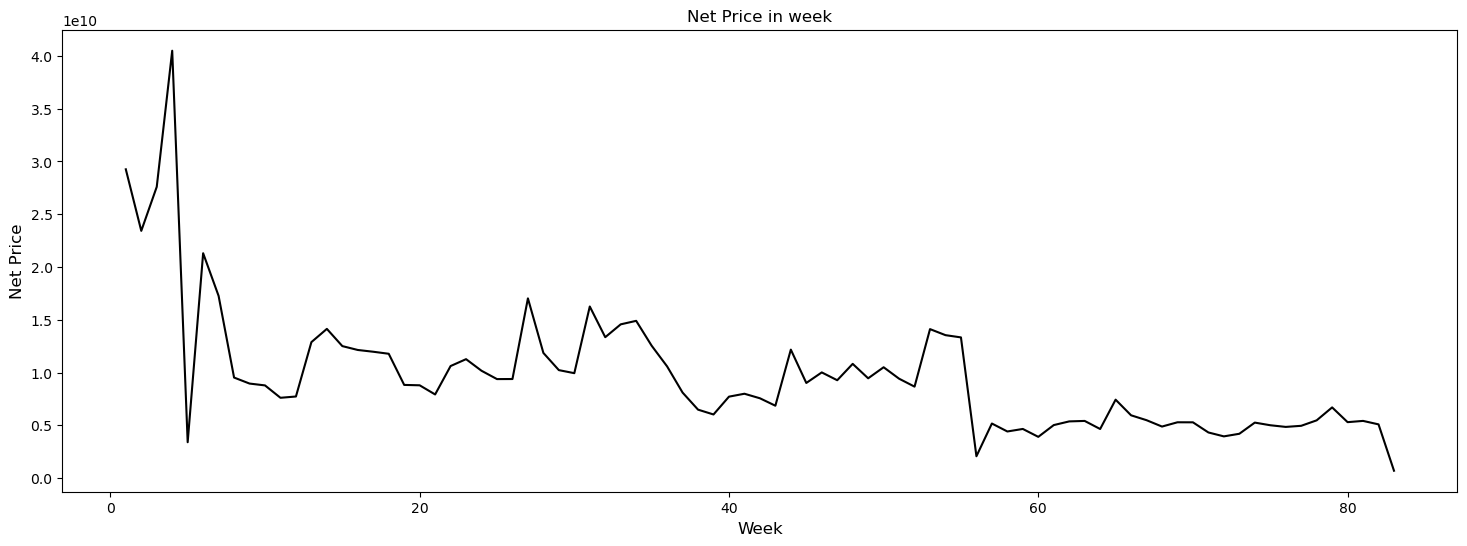

In [36]:
def timeseries (x_axis, y_axis, x_label, title):
    plt.figure(figsize = (18, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.title(title)
    plt.xlabel(x_label, {'fontsize': 12}) 
    plt.ylabel('Net Price', {'fontsize': 12})
    plt.show()
    
timeseries(range(1,84), result_by_week['net_price'], "Week", "Net Price in week")

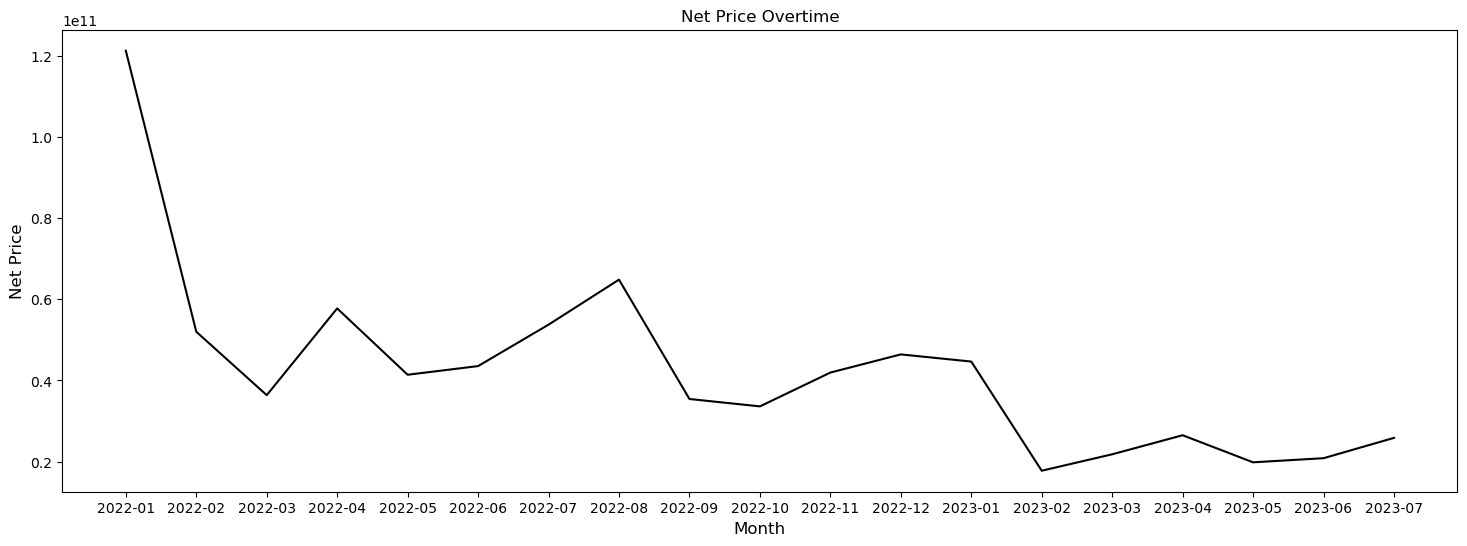

In [37]:
timeseries(result_by_month.index, result_by_month['net_price'], "Month", "Net Price Overtime")

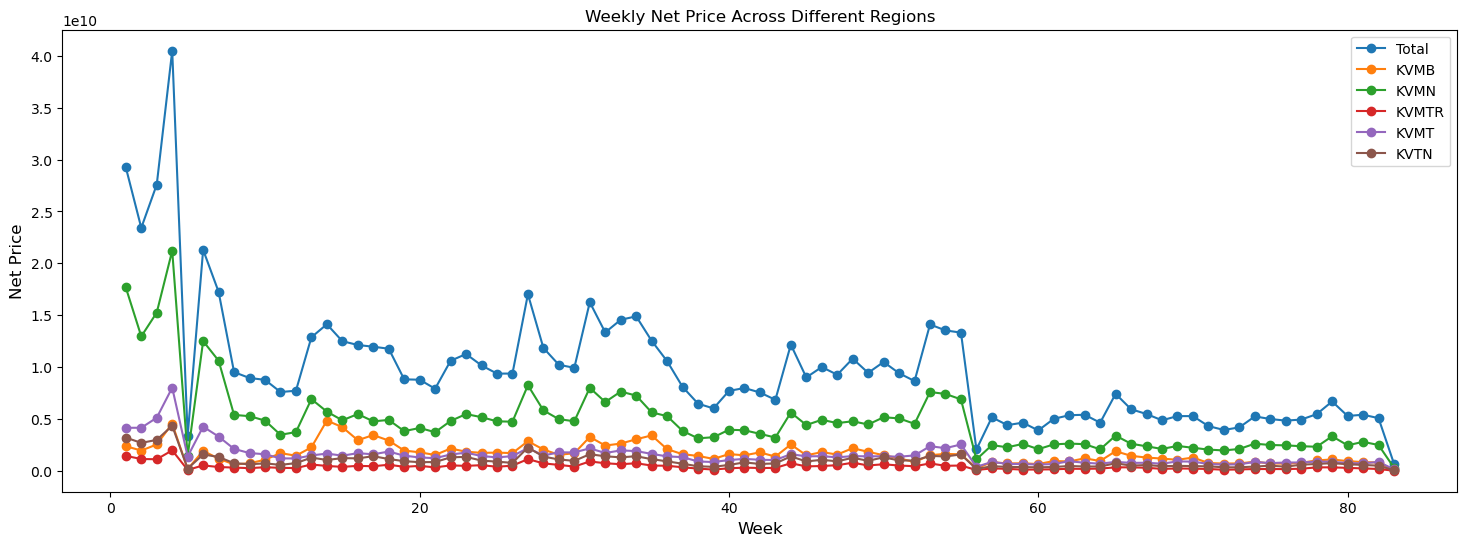

In [38]:
import matplotlib.pyplot as plt

def timeseries(x_axis, y_axis, label, linestyle='-', marker='o'):
    plt.plot(x_axis, y_axis, label=label, linestyle=linestyle, marker=marker)

# Assuming 'net_price' is the column you want to plot

plt.figure(figsize=(18, 6))

timeseries(range(1, 84),result_by_week['net_price'], "Total")
timeseries(range(1, 84),result_KVMB['net_price'], "KVMB")
timeseries(range(1, 84),result_KVMN['net_price'], "KVMN")
timeseries(range(1, 84),result_KVMTR['net_price'], "KVMTR") 
timeseries(range(1, 84),result_KVMT['net_price'], "KVMT") 
timeseries(range(1, 84),result_KVTN['net_price'], "KVTN")

plt.title("Weekly Net Price Across Different Regions")
plt.xlabel("Week", fontsize=12)
plt.ylabel("Net Price", fontsize=12)
plt.legend()
plt.show()


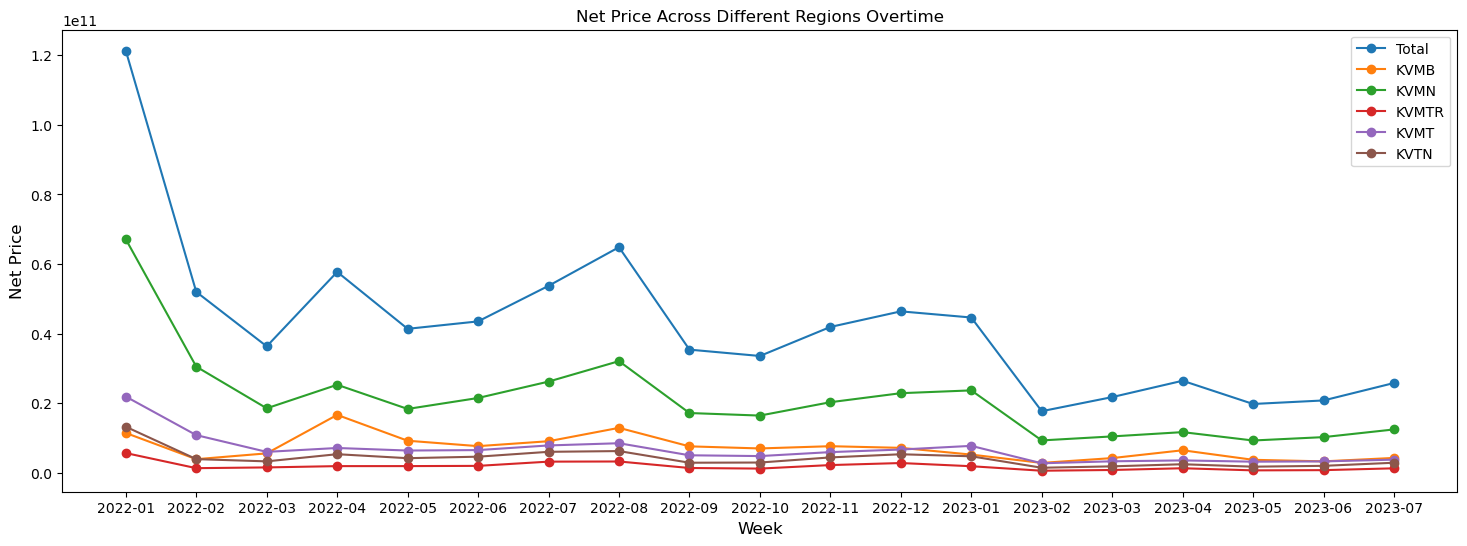

In [39]:
plt.figure(figsize=(18, 6))

timeseries(result_by_month.index,result_by_month['net_price'], "Total")
timeseries(result_by_month.index,result_KVMB_month['net_price'], "KVMB")
timeseries(result_by_month.index,result_KVMN_month['net_price'], "KVMN")
timeseries(result_by_month.index,result_KVMTR_month['net_price'], "KVMTR") 
timeseries(result_by_month.index,result_KVMT_month['net_price'], "KVMT") 
timeseries(result_by_month.index,result_KVTN_month['net_price'], "KVTN")

plt.title("Net Price Across Different Regions Overtime")
plt.xlabel("Week", fontsize=12)
plt.ylabel("Net Price", fontsize=12)
plt.legend()
plt.show()

In [40]:
netpr= pd.DataFrame(result_by_week)

# Extracting the "net_price" column
netpr = netpr[['net_price','cost_price']]

# Displaying the result
print(result_by_week)

      sold_quantity   cost_price    net_price  week
week                                               
01           228647  22380873930  29252908365     1
02           164601  17207306000  23423110275     2
03           189463  19894780340  27590514429     3
04           275046  28863087090  40486110403     4
05            24455   2345966640   3399711680     5
...             ...          ...          ...   ...
27            35123   5131344226   6698369851    79
28            28732   3927321840   5300735028    80
29            30515   4037900840   5419778811    81
30            27667   3697672369   5091499462    82
31             3839    504426091    700351310    83

[83 rows x 4 columns]


In [41]:
result_by_week.set_index('week',inplace=True)

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example time series data  ,'cost_price'
# Replace this with your actual time series data
np.random.seed(0)
data = result_by_week[['net_price']]
# Hyperparameters
sequence_length = 79
num_epochs = 300
batch_size = 10
num_units = 50  # Number of LSTM units in each direction
forecast_horizon = 1  # Number of future values to forecast
print (len(data))
# Preprocess the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for training
sequences = []
targets = []
for i in range(len(data) - sequence_length - forecast_horizon +1):
    sequences.append(data_normalized[i:i+sequence_length])
    targets.append(data_normalized[i+sequence_length:i+sequence_length+forecast_horizon])

X_train = np.array(sequences)
y_train = np.array(targets)

# Build the parallel Bi-LSTM model


83


In [43]:
model = Sequential()
model.add(Bidirectional(LSTM(num_units, input_shape=(sequence_length, 1))))
model.add(Dense(forecast_horizon))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=10)

# Make predictions on the entire dataset
predictions_normalized = model.predict(X_train)
# Inverse transform the predictions to get them in the original scale
predictions_original_scale = scaler.inverse_transform(predictions_normalized)

predictions_original_scale



Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

array([[5.231336e+09],
       [5.508965e+09],
       [5.068955e+09],
       [7.059258e+08]], dtype=float32)

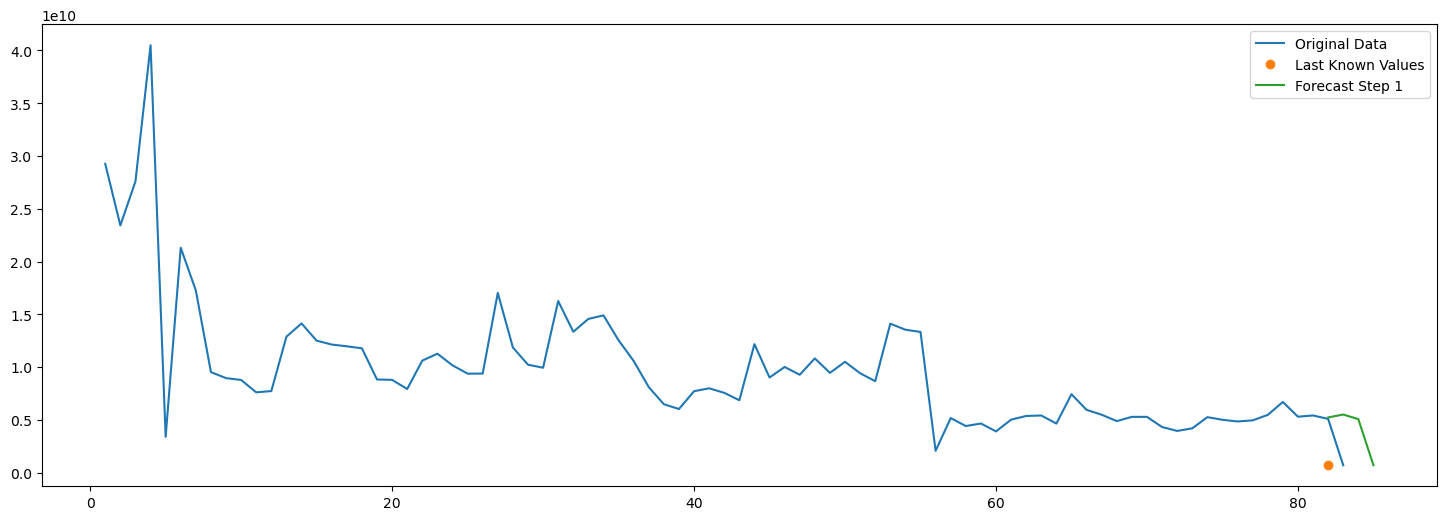

In [44]:
# Plot the results
plt.figure(figsize=(18, 6))
plt.plot(data, label='Original Data')

# Plot the last known values in the original data
last_known_index = len(data) - forecast_horizon
plt.plot(range(last_known_index, len(data)), data[last_known_index:], 'o', label='Last Known Values')

# Plot the forecasted values
for i in range(forecast_horizon):
    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)), predictions_original_scale[:, i], label=f'Forecast Step {i + 1}')

plt.legend()
plt.show()

In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Generate some example time series data  ,'cost_price'
# Replace this with your actual time series data
np.random.seed(0)
data = result_by_month[['net_price']]
# Hyperparameters
sequence_length = 15
num_epochs = 300
batch_size = 10
num_units = 50  # Number of LSTM units in each direction
forecast_horizon = 1  # Number of future values to forecast
print (len(data))
# Preprocess the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Create sequences for training
sequences = []
targets = []
for i in range(len(data) - sequence_length - forecast_horizon +1):
    sequences.append(data_normalized[i:i+sequence_length])
    targets.append(data_normalized[i+sequence_length:i+sequence_length+forecast_horizon])

X_train = np.array(sequences)
y_train = np.array(targets)



19


In [46]:
# Build the parallel Bi-LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(num_units, input_shape=(sequence_length, 1))))
model.add(Dense(forecast_horizon))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=10)

# Make predictions on the entire dataset
predictions_normalized = model.predict(X_train)
# Inverse transform the predictions to get them in the original scale
predictions_original_scale = scaler.inverse_transform(predictions_normalized)

predictions_original_scale



Epoch 1/300
Epoch 2/300
Epoch 3/300
Epoch 4/300
Epoch 5/300
Epoch 6/300
Epoch 7/300
Epoch 8/300
Epoch 9/300
Epoch 10/300
Epoch 11/300
Epoch 12/300
Epoch 13/300
Epoch 14/300
Epoch 15/300
Epoch 16/300
Epoch 17/300
Epoch 18/300
Epoch 19/300
Epoch 20/300
Epoch 21/300
Epoch 22/300
Epoch 23/300
Epoch 24/300
Epoch 25/300
Epoch 26/300
Epoch 27/300
Epoch 28/300
Epoch 29/300
Epoch 30/300
Epoch 31/300
Epoch 32/300
Epoch 33/300
Epoch 34/300
Epoch 35/300
Epoch 36/300
Epoch 37/300
Epoch 38/300
Epoch 39/300
Epoch 40/300
Epoch 41/300
Epoch 42/300
Epoch 43/300
Epoch 44/300
Epoch 45/300
Epoch 46/300
Epoch 47/300
Epoch 48/300
Epoch 49/300
Epoch 50/300
Epoch 51/300
Epoch 52/300
Epoch 53/300
Epoch 54/300
Epoch 55/300
Epoch 56/300
Epoch 57/300
Epoch 58/300
Epoch 59/300
Epoch 60/300
Epoch 61/300
Epoch 62/300
Epoch 63/300
Epoch 64/300
Epoch 65/300
Epoch 66/300
Epoch 67/300
Epoch 68/300
Epoch 69/300
Epoch 70/300
Epoch 71/300
Epoch 72/300
Epoch 73/300
Epoch 74/300
Epoch 75/300
Epoch 76/300
Epoch 77/300
Epoch 78

array([[2.6637343e+10],
       [1.9565832e+10],
       [2.1413136e+10],
       [2.5678207e+10]], dtype=float32)

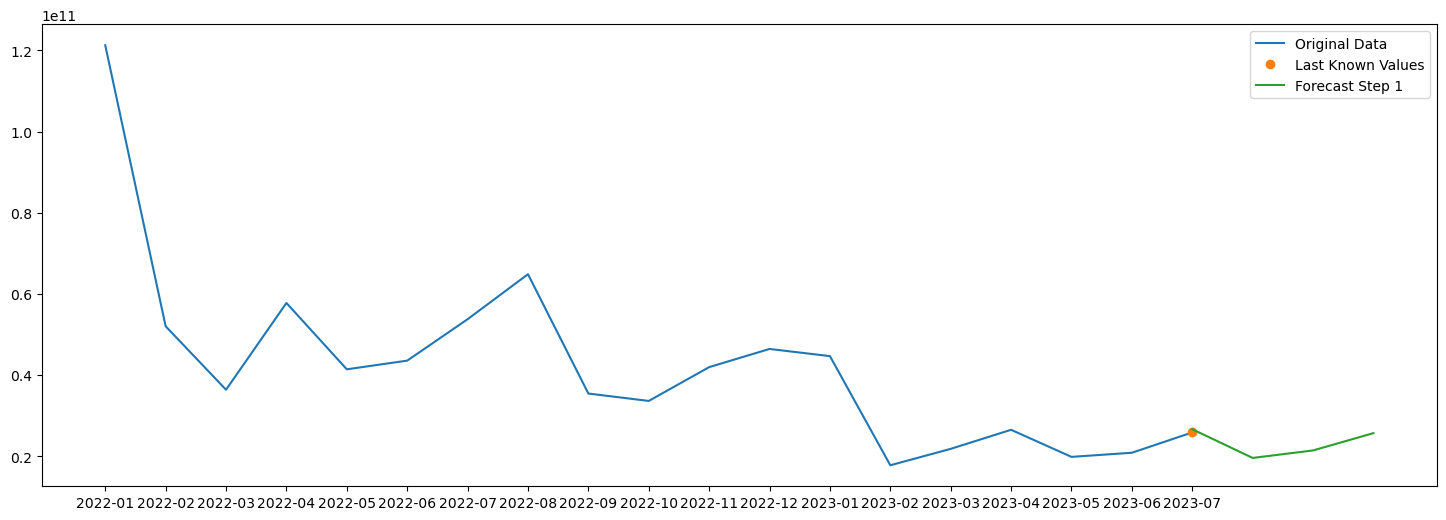

In [47]:
# Plot the results
plt.figure(figsize=(18, 6))
plt.plot(data, label='Original Data')

# Plot the last known values in the original data
last_known_index = len(data) - forecast_horizon
plt.plot(range(last_known_index, len(data)), data[last_known_index:], 'o', label='Last Known Values')

# Plot the forecasted values
for i in range(forecast_horizon):
    plt.plot(range(last_known_index + i, last_known_index + len(predictions_original_scale)), predictions_original_scale[:, i], label=f'Forecast Step {i + 1}')

plt.legend()
plt.show()